## ${\textbf{Libraries}}$

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## ${\textbf{Data Import}}$

In [2]:
df_purchase = pd.read_csv('purchase_data.csv')

## ${\textbf{Data Exploration}}$

In [3]:
'''
ID
Shows a unique identificator of a customer.

Day	
Day when the customer has visited the store 

Incidence
Purchase Incidence
0 The customer has not purchased an item from the category of interest 
1 The customer has purchased an item from the category of interest 

Brand 
[1-5] Shows which brand the customer has purchased
0 No brand was purchased

Quantity
Number of items bought by the customer from the product category of interest

Last_Inc_Brand
[1, 5] Shows which brand the customer has purchased on their previous store visit
0 No brand was purchased

Last_Inc_Quantity	
Number of items bought by the customer from the product category of interest during their previous store visit

Price_1
Price of an item from Brand 1 on a particular day

Price_2
Price of an item from Brand 2 on a particular day

Price_3	
Price of an item from Brand 3 on a particular day

Price_4	
Price of an item from Brand 4 on a particular day

Price_5	
Price of an item from Brand 5 on a particular day

Promotion_1
Indicator whether Brand 1 was on promotion or not on a particular day
0 There is no promotion
1 There is promotion

Promotion_2
Indicator whether Brand 2 was on promotion or not on a particular day
0 There is no promotion
1 There is promotion
Promotion_3
Indicator whether Brand 3 was on promotion or not on a particular day
0 There is no promotion
1 There is promotion
Promotion_4
Indicator whether Brand 4 was on promotion or not on a particular day
0 There is no promotion
1 There is promotion
Promotion_5
Indicator whether Brand 5 was on promotion or not on a particular day
0 There is no promotion
1 There is promotion
Sex	
Biological sex (gender) of a customer. In this dataset there are only 2 different options.
0 male
1 female

Age
The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset

Annual_purchase
It’s the spend by the customer over last year in euros.
City_size
The size of the city that the customer lives in.
0 small city
1 mid-sized city
2 big city
'''
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Age,Annual_purchase,City_size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,2.66,0,1,0,0,0,0,47,5543,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,2.66,0,0,0,0,0,0,47,5543,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,2.66,0,0,0,0,0,0,47,5543,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,2.66,0,0,0,0,0,0,47,5543,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,2.66,0,0,0,0,0,0,47,5543,0


In [4]:
#no nulls
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Age                  0
Annual_purchase      0
City_size            0
dtype: int64

## ${\textbf{Data Segmentation}}$

### ${\textbf{Import Segmentation Model}}$

In [5]:
#imports the scaler from segmentation model
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [6]:
#imports the pca model from segmentation model
pca = pickle.load(open('pca.pickle', 'rb'))

In [7]:
#imports the kmeans pca  clasification model from segmentation model
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### ${\textbf{Standardization}}$

In [8]:
#standarization of the data for hight numeric diferences on fields
features = df_purchase[['Sex', 'Age', 'Annual_purchase', 'City_size']]
df_purchase_segm_std = scaler.transform(features)

### ${\textbf{PCA}}$

In [9]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### ${\textbf{K-means PCA}}$

In [10]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [11]:
df_purchase_predictors = df_purchase.copy()

In [12]:
#add the column Segment that is result of the prediction from the clasification made on segmentation notebook
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## ${\textbf{Descriptive Analysis by Segments}}$

### ${\textbf{Data Analysis by Customer}}$

In [43]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Age,Annual_purchase,City_size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,1,0,0,0,0,47,5543,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,0,47,5543,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,0,47,5543,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,0,47,5543,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,0,47,5543,0,1


In [44]:
df_purchase_predictors

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Age,Annual_purchase,City_size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,1,0,0,0,0,47,5543,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,0,47,5543,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,0,47,5543,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,0,47,5543,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,0,47,5543,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,1,0,0,0,42,6047,0,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,0,42,6047,0,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,0,42,6047,0,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,0,42,6047,0,1


In [45]:
#As every row is a visit to the shop and the id is the unique customer identifier, gets the total visits from every customer.
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [46]:
#500 customers
temp1

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [15]:
#As every row is a visit to the shop and the id is the unique customer identifier, gets the total number of purchases from every customer.
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [16]:
#just the average purchases / number of visits
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [17]:
#add the segment of PCA_Knime calculated before
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [18]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,1.0
200000002,87,11,0.126437,0.0
200000003,97,10,0.103093,1.0
200000004,85,11,0.129412,1.0
200000005,111,13,0.117117,0.0


### ${\textbf{Segment Proportions}}$

In [19]:
#the number(in percentage 1) of every segment
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.314
1.0,0.362
2.0,0.324


Text(0.5, 1.0, 'Segment Proportions')

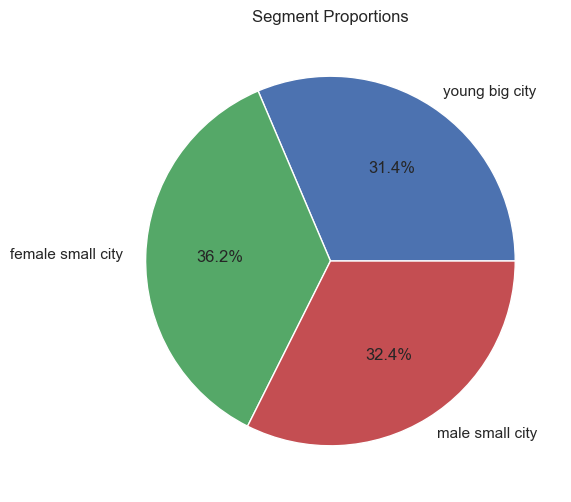

In [20]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['young big city','female small city ','male small city'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r'))
plt.title('Segment Proportions')

In [21]:
#very similar

### ${\textbf{Purchase Occasion and Purchase Incidence}}$

In [22]:
#visits, purchases and average purchases mean by segment
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,120.968153,38.656051,0.297057
1.0,115.988950,26.889503,0.221085
2.0,115.475309,22.851852,0.199885


In [23]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

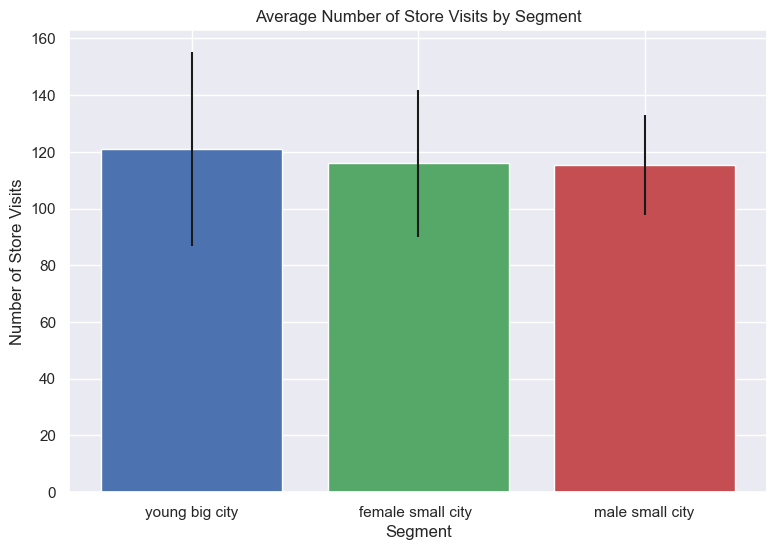

In [24]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2),
        tick_label = ('young big city','female small city ','male small city'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

In [25]:
#very balanced average store visits

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

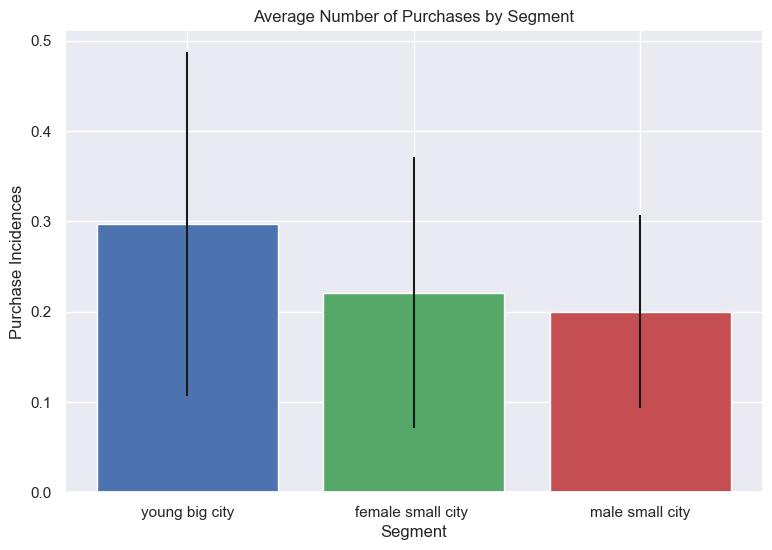

In [28]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2), 
        tick_label = ('young big city','female small city ','male small city'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('b', 'g', 'r'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

In [29]:
#on average Maintains the proportion on visits 
#buy more youngs big city
#second females small city
#thrid males from small city


### ${\textbf{Brand Choice}}$

In [30]:
#filter only the buys of the product in study
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [31]:
#let's see what brand purchase every segment
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,1,200000001
11,False,False,False,False,True,1,200000001
19,True,False,False,False,False,1,200000001
24,False,False,False,True,False,1,200000001
29,False,True,False,False,False,1,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,1,200000500
58648,True,False,False,False,False,1,200000500
58674,False,True,False,False,False,1,200000500
58687,False,True,False,False,False,1,200000500


In [32]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [33]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

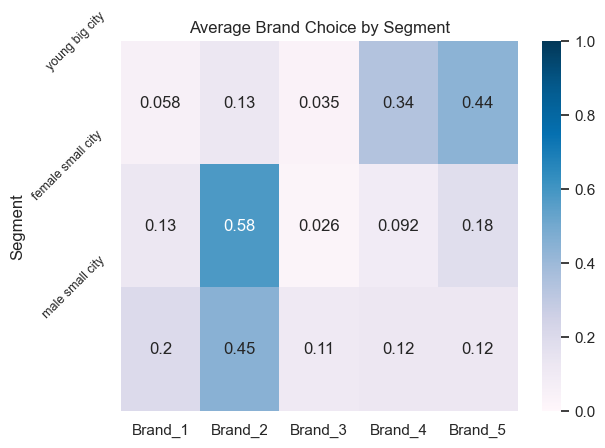

In [34]:
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2], ['young big city','female small city ','male small city'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

In [35]:
# young big city buys brand 4 and 5
#female small city buys Brand_2
#males small city buys brand_2 too.

### ${\textbf{Revenue}}$

In [36]:
#let's see revenue
#by segment and brand
#the segment2 (male small city) have the best revenue for the brand 1
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\usuario\AppData\Local\Temp\ipykernel_9176\1044928483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']


,Segment,Revenue Brand 1
0,0,1198.52
1,1,2042.45
2,2,3064.68


In [37]:
#let's see revenue
#by segment and brand
#the segment1 (male on small city) have the best revenue for the brand 2
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\usuario\AppData\Local\Temp\ipykernel_9176\2242682004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']


,Segment,Revenue Brand 1,Revenue Brand 2
0,0,1198.52,2396.60
1,1,2042.45,11702.38
2,2,3064.68,7669.33


In [38]:
#let's see revenue
#by segment and brand
#the segment2 (male small city) have the best revenue for the brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\usuario\AppData\Local\Temp\ipykernel_9176\3923891976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,1198.52,2396.60,1255.45
1,1,2042.45,11702.38,711.07
2,2,3064.68,7669.33,4055.00


In [39]:
#let's see revenue
#by segment and brand
#the segment0 (young big city) have the best revenue for the brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\usuario\AppData\Local\Temp\ipykernel_9176\1067070297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,1198.52,2396.60,1255.45,13163.21
1,1,2042.45,11702.38,711.07,2659.42
2,2,3064.68,7669.33,4055.00,3217.47


In [40]:
#let's see revenue
#by segment and brand
#the segment0 (young big city) have the best revenue for the brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\usuario\AppData\Local\Temp\ipykernel_9176\2760057798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,1198.52,2396.60,1255.45,13163.21,19919.77
1,1,2042.45,11702.38,711.07,2659.42,6968.36
2,2,3064.68,7669.33,4055.00,3217.47,2732.87


In [41]:
#the sum of revenue
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,1198.52,2396.60,1255.45,13163.21,19919.77,37933.55
1,1,2042.45,11702.38,711.07,2659.42,6968.36,24083.68
2,2,3064.68,7669.33,4055.00,3217.47,2732.87,20739.35


In [42]:
#add the segment name as index
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'young big city',
                                                                           1:'female small city',
                                                                           2:'male small city'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
young big city,1198.52,2396.60,1255.45,13163.21,19919.77,37933.55,0.314
female small city,2042.45,11702.38,711.07,2659.42,6968.36,24083.68,0.362
male small city,3064.68,7669.33,4055.00,3217.47,2732.87,20739.35,0.324
